In [7]:
import numpy as np
import jax
import jax.numpy as jnp
from jax.example_libraries import stax, optimizers
import matplotlib.pyplot as plt
import pinns 
import datetime
import jax.scipy.optimize
import jax.flatten_util
import scipy
import scipy.optimize

from jax.config import config
config.update("jax_enable_x64", True)
rnd_key = jax.random.PRNGKey(123)

In [8]:
knots2d = np.array([ [[-1,-1,0],[0,-1,0],[1,-1,0]] , [[-1,0,0],[0,0,0],[1,0,0]] , [[-1,1,0],[0,1,0],[1,1,0]]])
knots = np.concatenate(tuple([knots2d[None,...]]*5),0)
knots[0,...,2] = -1
knots[1,...,2] = -0.5
knots[2,...,2] = 0
knots[3,...,2] = 0.5
knots[4,...,2] = 1
weights = np.ones(knots.shape[:3])

weights[0,:,:] = 1/3
weights[0,1,1] = 1/2

basis1 = pinns.bspline.BSplineBasis(np.linspace(0,1,4),2)
basis2 = pinns.bspline.BSplineBasis(np.linspace(0,1,2),2)
basis3 = pinns.bspline.BSplineBasis(np.linspace(0,1,2),2)

print(basis1)
print(basis2)
print(basis3)

geom = pinns.geometry.PatchNURBS([basis1,basis2,basis3],knots,weights, rnd_key)

B-Spline basis of degree 2 and dimension 5
B-Spline basis of degree 2 and dimension 3
B-Spline basis of degree 2 and dimension 3


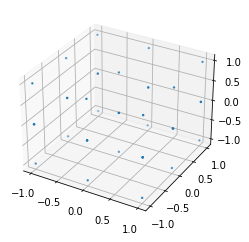

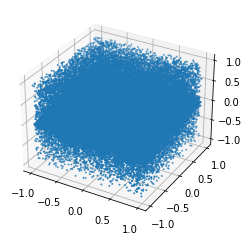

In [11]:
fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter(knots[...,0].flatten(), knots[...,1].flatten(), knots[...,2].flatten(), s = 2)

Ps = geom(np.random.rand(100000,3))

fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter(Ps[:,0], Ps[:,1], Ps[:,2], s = 1)